# Tomato Ripeness Detection
Using transfer learning, creating a model that detects and classifies if a tomato is ripe

In [ ]:
!pip install pylabel

In [22]:
api_token = {"username":"mohammedejazzur","key":"b546bbf6eb9f6c5858a0b55c030590ec"}

import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
import kaggle
from pylabel import importer

#### Loading Data

In [ ]:
!kaggle datasets download "nexuswho/tomatod" -d "/content/tomatod/"
!unzip "/content/tomatod.zip" -d "/content/tomatod/"

In [31]:
#Specify path to the coco.json file
path_to_annotations = "/content/tomatod/annotations/tomatOD_train.json"
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = "/content/tomatod/images/train"

#Import the dataset into the pylable schema
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="BCCD_coco")
dataset.df[dataset.df['img_filename'] == 'stereo20190405_132743_p0_snap_488.jpg']

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_iscrowd,ann_keypoints,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/content/tomatod/images/train,stereo20190405_132743_p0_snap_488.jpg,,0,1000,1000,,,880,652,...,,,,,,1,unripe,tomato,,1
1,/content/tomatod/images/train,stereo20190405_132743_p0_snap_488.jpg,,0,1000,1000,,,561,690,...,,,,,,3,fully-ripe,tomato,,1
2,/content/tomatod/images/train,stereo20190405_132743_p0_snap_488.jpg,,0,1000,1000,,,852,913,...,,,,,,3,fully-ripe,tomato,,1
3,/content/tomatod/images/train,stereo20190405_132743_p0_snap_488.jpg,,0,1000,1000,,,534,930,...,,,,,,3,fully-ripe,tomato,,1
4,/content/tomatod/images/train,stereo20190405_132743_p0_snap_488.jpg,,0,1000,1000,,,473,165,...,,,,,,1,unripe,tomato,,1
5,/content/tomatod/images/train,stereo20190405_132743_p0_snap_488.jpg,,0,1000,1000,,,637,154,...,,,,,,1,unripe,tomato,,1
6,/content/tomatod/images/train,stereo20190405_132743_p0_snap_488.jpg,,0,1000,1000,,,545,303,...,,,,,,1,unripe,tomato,,1
7,/content/tomatod/images/train,stereo20190405_132743_p0_snap_488.jpg,,0,1000,1000,,,554,391,...,,,,,,1,unripe,tomato,,1


In [32]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")

Number of images: 222
Number of classes: 3
Classes:['unripe', 'semi-ripe', 'fully-ripe']
Class counts:
unripe        1301
fully-ripe     332
semi-ripe      320
Name: cat_name, dtype: int64
Path to annotations:
/content/tomatod/annotations


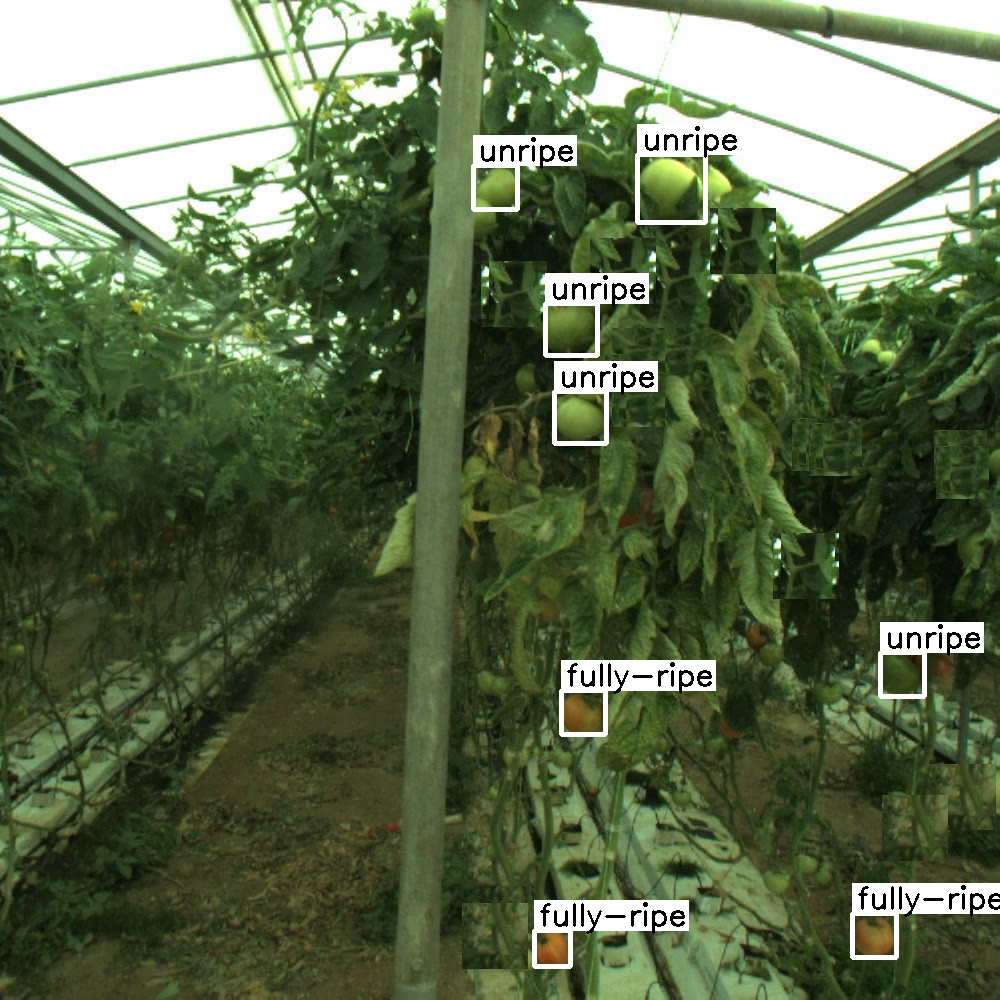

In [35]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(0))

## Object Detection
Is that a tomato?


In [38]:
# Loading resnet model
from torchvision import models
resnet = models.resnet101(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 132MB/s]
